<a href="https://colab.research.google.com/github/jcdumlao14/Supervised-Learning-Algorithms--Classification/blob/main/1_BasicLogisticRegression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Logistic Regression On Liver Problem**

# **Loading Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# **Laoding the Datasets**

In [ ]:
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')


In [ ]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


In [ ]:
liver_data.shape

(500, 11)

In [ ]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
liver_data['Liver_Problem'].value_counts()

1    350
2    150
Name: Liver_Problem, dtype: int64

# **Data Visualization**

Number of patients diagnosed with liver Problem:  350
Number of patients not diagnosed with liver Problelm:  150


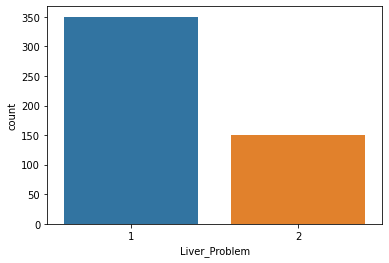

In [ ]:
sns.countplot(data=liver_data, x = 'Liver_Problem', label='Count')

LD, NLD = liver_data['Liver_Problem'].value_counts()
print('Number of patients diagnosed with liver Problem: ',LD)
print('Number of patients not diagnosed with liver Problelm: ',NLD)

Number of patients that are male:  372
Number of patients that are female:  128


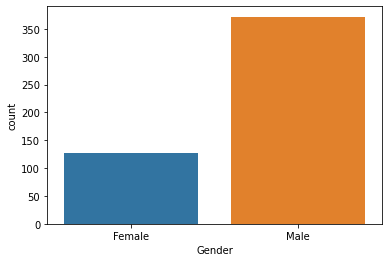

In [ ]:
import seaborn as sns
sns.countplot(data=liver_data, x = 'Gender', label='Count')

M, F = liver_data['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

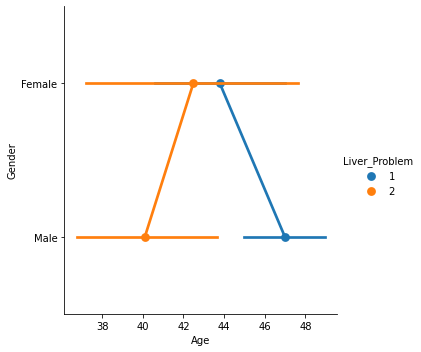

In [ ]:
sns.factorplot(x="Age", y="Gender", hue="Liver_Problem", data=liver_data);

In [ ]:
liver_data[liver_data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [ ]:
liver_data.Albumin_and_Globulin_Ratio.fillna(liver_data['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

In [ ]:
le = LabelEncoder()
liver_data.Gender = le.fit_transform(liver_data.Gender)
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# **Explanation about Train and Test Data and its splitting**

## Separating input and target variables

y has the label or the target variable "Liver_Problem" - basically this is what we need to predict.

X has input variables which are used to predict y. Basically X has all the columns of our data excluding target variable "Liver_Problem"

In [ ]:
X = liver_data.drop('Liver_Problem', axis = 1)
y = liver_data['Liver_Problem']

## Splitting Data into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# **Building Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 5
True Negative 60
False Positive 6
False Negative 29


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.65

In [ ]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')

In [ ]:
test_new.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,Male,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1


In [ ]:
le = LabelEncoder()
test_new.Gender = le.fit_transform(test_new.Gender)
test_new.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,1,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,1,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,1,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,1,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,1,32.6,14.1,219,95,235,5.8,3.1,1.1


In [ ]:
Liver_Problem = model.predict(test_new)

# **Downloading the prediction file**

In [ ]:
res = pd.DataFrame(Liver_Problem)
res.index = test_new.index # its important for comparison
res.columns = ["Liver_Problem"]
res.to_csv("prediction_results_Liver_Problem.csv") # the csv file will be saved locally on the same location where this notebook is located.